# Lagrange Polynomial Interpolation

Lagrange form of interpolating polynomial is
    $$p_n(x) = \sum_{i = 1}^{n} l_j(x) f_j$$
    
with cardinal functions
    $$\begin{aligned}
    l_j(x)
    &= \left( \frac{x - x_0}{x_j - x_0} \right)
       \left( \frac{x - x_1}{x_j - x_1} \right)
       \cdots
       \left( \frac{x - x_{n-1}}{x_j - x_{n-1}} \right)
       \left( \frac{x - x_n}{x_j - x_n} \right)\\
    &= \prod_{k = 0,\ k\neq j}^{n}
       \left( \frac{x - x_k}{x_j - x_k} \right),
       \quad \quad j = 0, 1, \dots, n
    \end{aligned}$$

that obeys Kronecker delta function
    $$l_j(x_k)
    = \delta_{jk}
    = \left\{ \begin{matrix}
    0 && \text{if } j \neq k\\
    1 && \text{if } j = k
    \end{matrix} \right.$$

## Implementation

In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
def lagrange(points): 
    
    def polynomial(x):
        total_sum = 0
        n = len(points) 
        
        for i in range(n):  
            x_i, y_i = points[i] 
            
            def g(i, n):
                product = 1
                
                for j in range(n):
                    if i == j:
                        continue 
                        
                    x_j, y_j = points[j]  
                    product *= (x-x_j)/float(x_i-x_j)

                return product
            
            total_sum += y_i * g(i,n) 
        
        return total_sum
    return polynomial

## Example 1

Consider the problem of interpolating $f(x) = \ln(x)$ at these given nodes $(x_0, x_1, x_2, x_3, x_4) = (1, 1.6, 1.9, 2.7, 3)$.

Try to construct the Lagrange interploating polynomial $P(x)$.

In [21]:
def f(x):
    return np.log(x)
points = (
    (1, f(1)),
    (1.6, f(1.6)),
    (1.9, f(1.9)),
    (2.7, f(2.7)),
    (3, f(3))
)

P = lagrange(points)

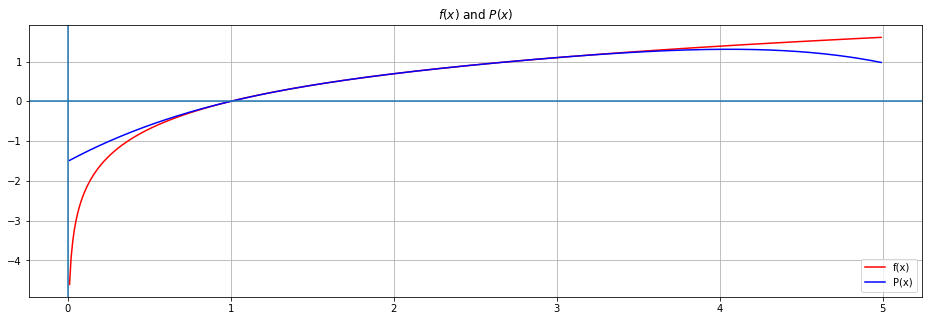

In [22]:
x_range = np.arange(0.01, 5, 0.01)
fig, ax = plt.subplots(figsize=(16, 5))

# Plot the function f(x)
ax.plot(x_range, f(x_range), color='r', label='f(x)')

# Plot the Lagrange interploating polynomial
ax.plot(x_range, P(x_range), color='b', label='P(x)')

# Add other text and items
ax.set_title(r'$f(x)$ and $P(x)$')
plt.legend(loc='lower right')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

## Example 2

Consider the __Runge function__
$$f(x) = \frac{1}{1 + 25x^2}.$$

Runge found that if this function is interpolated at equidistant points $x_i$ between −1 and 1 such that:
$$x_i = \frac{2i}{n} - 1, \quad i \in \{0, 1, 2, \dots, n\}$$

with a polynomial $P_n(x)$ of degree $\leq n$.

Try to construct the Lagrange interploating polynomial $P_n(x)$.

In [23]:
def f(x):
    return 1/(1+25*x**2)

## Consider equidistant points

### Construct the Lagrange interploating polynomial $P_{5}(x)$ with degree 5

In [24]:
n = 5
x = np.linspace(-1, 1, n+1)
points = [(xi, f(xi)) for xi in x]
P_5 = lagrange(points)

### Construct the Lagrange interploating polynomial $P_{10}(x)$ with degree 10

In [25]:
n = 10
x = np.linspace(-1, 1, n+1)
points = [(xi, f(xi)) for xi in x]
P_10 = lagrange(points)

### Construct the Lagrange interploating polynomial $P_{15}(x)$ with degree 15

In [26]:
n = 15
x = np.linspace(-1, 1, n+1)
points = [[xi, f(xi)] for xi in x]
P_15 = lagrange(points)

### Plot $P_{5}(x), P_{10}(x)$ and $P_{15}(x)$ to compare

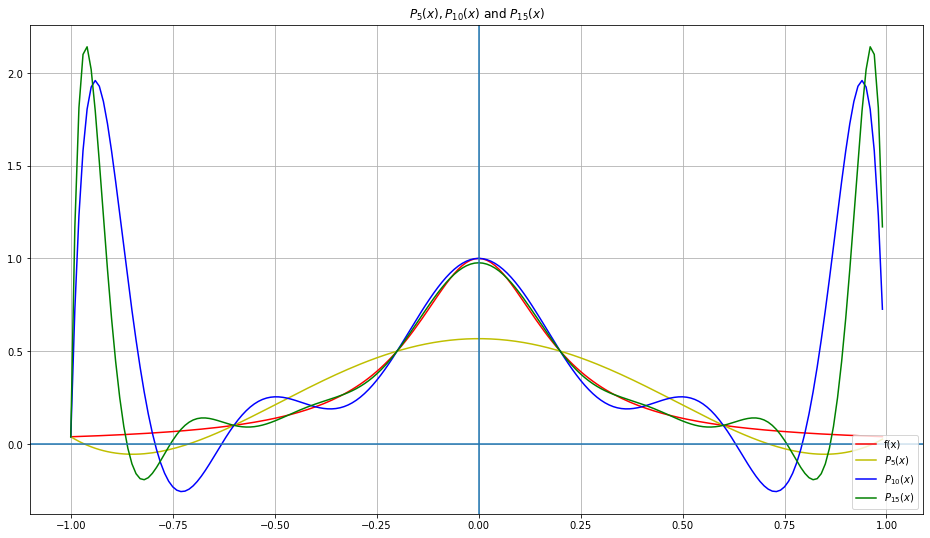

In [27]:
x_range = np.arange(-1, 1, 0.01)
fig, ax = plt.subplots(figsize=(16, 9))

# Plot the function f(x)
ax.plot(x_range, f(x_range), color='r', label='f(x)')

# Plot P1(x)
ax.plot(x_range, P_5(x_range), color='y', label='$P_{5}(x)$')

# Plot P2(x)
ax.plot(x_range, P_10(x_range), color='b', label='$P_{10}(x)$')

# Plot P3(x)
ax.plot(x_range, P_15(x_range), color='g', label='$P_{15}(x)$')

# Add other text and items
ax.set_title(r'$P_{5}(x), P_{10}(x)$ and $P_{15}(x)$')
plt.legend(loc='lower right')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### Plot error of $P_{5}(x), P_{10}(x)$ and $P_{15}(x)$

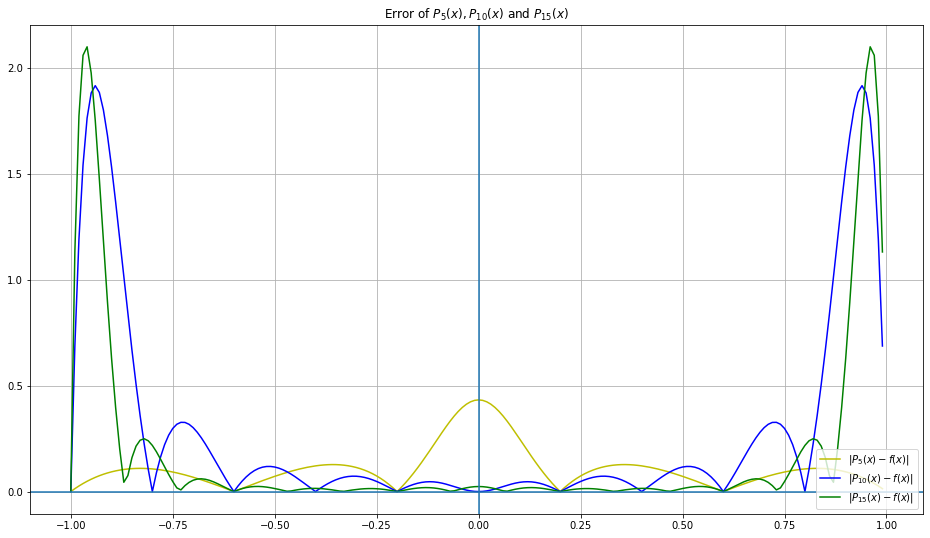

In [28]:
x_range = np.arange(-1, 1, 0.01)
fig, ax = plt.subplots(figsize=(16, 9))

# Plot error of P1(x)
ax.plot(x_range, abs(P_5(x_range) - f(x_range)), color='y', label='$|P_{5}(x) - f(x)|$')

# Plot error of P2(x)
ax.plot(x_range, abs(P_10(x_range) - f(x_range)), color='b', label='$|P_{10}(x) - f(x)|$')

# Plot error of P3(x)
ax.plot(x_range, abs(P_15(x_range) - f(x_range)), color='g', label='$|P_{15}(x) - f(x)|$')

# Add other text and items
ax.set_title(r'Error of $P_{5}(x), P_{10}(x)$ and $P_{15}(x)$')
plt.legend(loc='lower right')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

## Consider Chebyshev nodes
We can use Chebyshev nodes to mitigate the error near the boundary.

Consider arbitrary interval $[a, b]$, so called Chebyshev-Gauss-Lobatto nodes are
$$x_j = \frac{a + b}{2} + \frac{b - a}{2}\ \hat{x_j}, \quad \hat{x_j} = - \cos\left(\frac{j \pi}{n}\right), \quad j = 0, 1, 2, \dots, n.$$

Also, $\hat{x_j}$ are the roots of __the Chebyshev polynomial of the first kind of degree $n$__.

### Construct the Lagrange interploating polynomial $P_{5}(x)$ with degree 5

In [29]:
n = 5
x = -np.cos(np.linspace(0, np.pi, n+1))
points = [(xi, f(xi)) for xi in x]
P_5 = lagrange(points)

### Construct the Lagrange interploating polynomial $P_{10}(x)$ with degree 10

In [30]:
n = 10
x = -np.cos(np.linspace(0, np.pi, n+1))
points = [(xi, f(xi)) for xi in x]
P_10 = lagrange(points)

### Construct the Lagrange interploating polynomial $P_{15}(x)$ with degree 15

In [31]:
n = 15
x = -np.cos(np.linspace(0, np.pi, n+1))
points = [(xi, f(xi)) for xi in x]
P_15 = lagrange(points)

### Plot $P_{5}(x), P_{10}(x)$ and $P_{15}(x)$ to compare

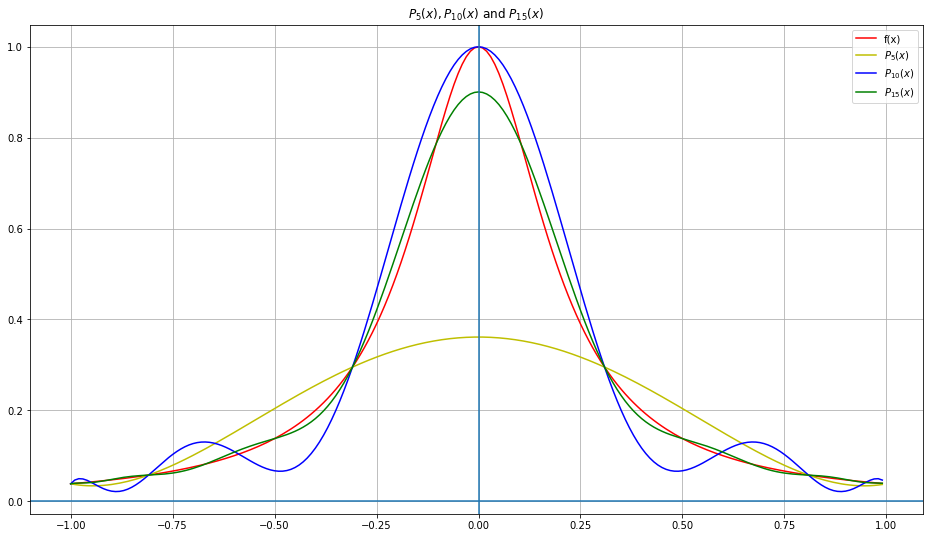

In [32]:
x_range = np.arange(-1, 1, 0.01)
fig, ax = plt.subplots(figsize=(16, 9))

# Plot the function f(x)
ax.plot(x_range, f(x_range), color='r', label='f(x)')

# Plot P1(x)
ax.plot(x_range, P_5(x_range), color='y', label='$P_{5}(x)$')

# Plot P2(x)
ax.plot(x_range, P_10(x_range), color='b', label='$P_{10}(x)$')

# Plot P3(x)
ax.plot(x_range, P_15(x_range), color='g', label='$P_{15}(x)$')

# Add other text and items
ax.set_title(r'$P_{5}(x), P_{10}(x)$ and $P_{15}(x)$')
plt.legend(loc='upper right')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### Plot error of $P_{5}(x), P_{10}(x)$ and $P_{15}(x)$

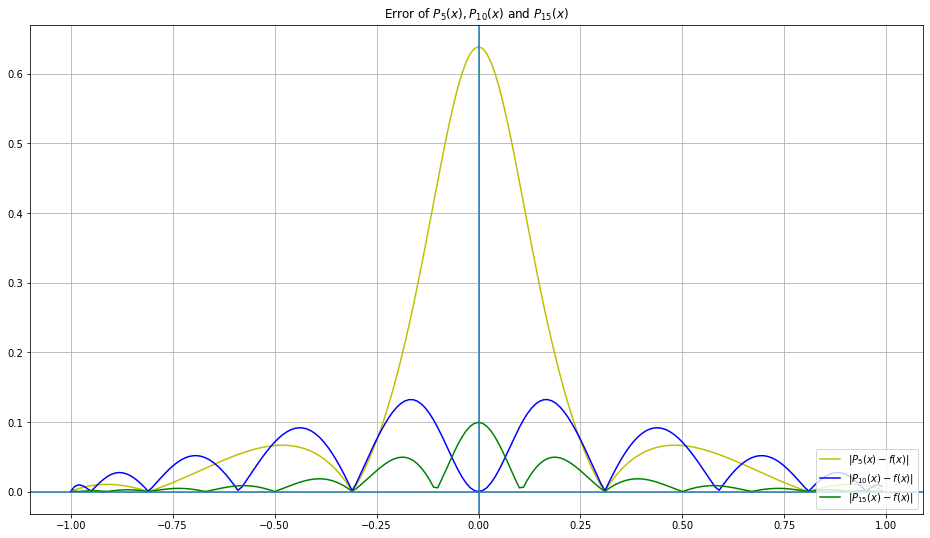

In [33]:
x_range = np.arange(-1, 1, 0.01)
fig, ax = plt.subplots(figsize=(16, 9))

# Plot error of P1(x)
ax.plot(x_range, abs(P_5(x_range) - f(x_range)), color='y', label='$|P_{5}(x) - f(x)|$')

# Plot error of P2(x)
ax.plot(x_range, abs(P_10(x_range) - f(x_range)), color='b', label='$|P_{10}(x) - f(x)|$')

# Plot error of P3(x)
ax.plot(x_range, abs(P_15(x_range) - f(x_range)), color='g', label='$|P_{15}(x) - f(x)|$')

# Add other text and items
ax.set_title(r'Error of $P_{5}(x), P_{10}(x)$ and $P_{15}(x)$')
plt.legend(loc='lower right')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()